In [24]:
#Visualizing the History of Nobel Prize Winners
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Loading the .csv file for nobel winners
nobel_data = pd.read_csv('nobel.csv')

In [26]:
#1. What is the most commonly 
# awarded gender and birth country?

#The most commonly awarded gender
gender_count = nobel_data['sex'].value_counts().reset_index()
top_gender = str(gender_count.iloc[0,0])
gender_awards = gender_count.iloc[0,1]
print(f'The most commonly awarded gender is the gender: {top_gender}.\n')
print(f'This gender has acculumated {gender_awards} total awards.\n')

#The most commonly awarded birth country
b_country_count = nobel_data['birth_country'].value_counts().reset_index()
top_country = str(b_country_count.iloc[0,0])
top_country_awards = b_country_count.iloc[0,1]
print(f'The most commonly awarded birth country is : {top_country}, with a total of {top_country_awards} accumulated awards.\n')

The most commonly awarded gender is the gender: Male.

This gender has acculumated 905 total awards.

The most commonly awarded birth country is : United States of America, with a total of 291 accumulated awards.



The decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories is the decade 2000, with 42.28% of the awards given that decade gone to US-born winners.



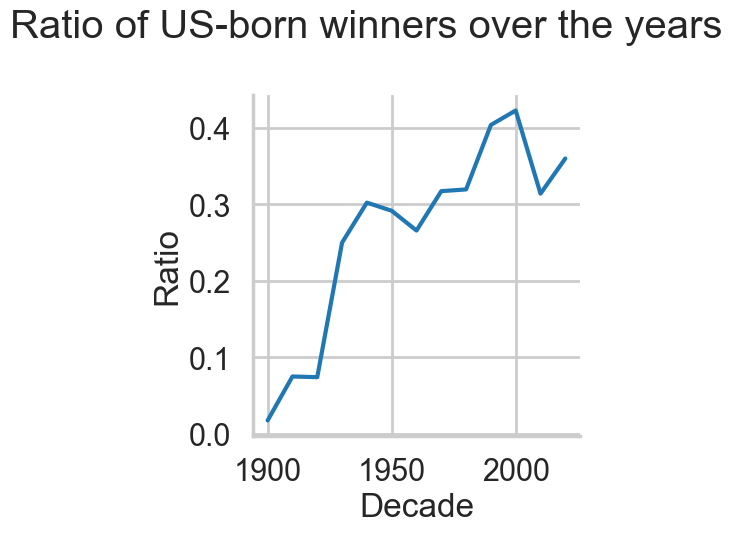

In [27]:
#2. Which decade had the highest ratio of US-born Nobel Prize winners 
# to total winners in all categories?

#Creating the decade column
nobel_data['decade'] = np.floor(nobel_data['year'] / 10)
nobel_data['decade'] = nobel_data['decade'].astype(int) * 10

#Creating the us-born winners column
nobel_data['US-BORN'] = nobel_data['birth_country'] == 'United States of America'

#Calculating the max ratio
usa_decade_ratio = nobel_data.groupby('decade', as_index=False)['US-BORN'].mean()
top_ratio = usa_decade_ratio['US-BORN'].max()

#Finding the max decade            
usa_top_decade_ratio = usa_decade_ratio[usa_decade_ratio['US-BORN']==top_ratio]
max_decade_usa = int(usa_top_decade_ratio.iloc[0,0])
top_ratio = (top_ratio*100).round(2)
print(f'The decade with the highest ratio of US-born Nobel Prize winners to total winners in all categories is the decade {max_decade_usa}, with {top_ratio}% of the awards given that decade gone to US-born winners.\n')

#Create a relational line plot
sns.set_context('poster')
sns.set_style('whitegrid')
g = sns.relplot(x='decade', y='US-BORN', 
                data=usa_decade_ratio, 
                kind='line', 
                markers=True)
g.set(xlabel = 'Decade',
      ylabel = 'Ratio')
g.figure.suptitle('Ratio of US-born winners over the years', y=1.1)
plt.show()

In [28]:
#3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?

#Creating boolean column for female winners
nobel_data['female_bool'] = nobel_data['sex'] == 'Female'

#Finding the decade and Nobel Prize category combination had the highest proportion of female laureates
decade_category = nobel_data.groupby(['decade', 'category'], as_index=False)['female_bool'].mean()
top_fem = decade_category['female_bool'].max()
top_decade_category = decade_category[decade_category['female_bool']==top_fem]

#Creating the dictionary
max_female_dict = {top_decade_category.iloc[0,0] : top_decade_category.iloc[0,1]}
print(max_female_dict)

{2020: 'Literature'}


In [29]:
#4. Who was the first woman to receive a Nobel Prize, and in what category?

#Filtering the data to find the 1st woman who won the Prize
#And store the correct data to the name and category of her
first_woman = nobel_data[nobel_data['sex']=='Female'].sort_values(by='year').iloc[0]
first_woman_name = str(first_woman['full_name'])
first_woman_category = str(first_woman['category'])
print(f'The 1st woman to ever receive a Nobel Prize was {first_woman_name} in the {first_woman_category} category.\n')

The 1st woman to ever receive a Nobel Prize was Marie Curie, née Sklodowska in the Physics category.



In [ ]:
#5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

#Calculating the frequency of the values in the 'full_name' column
names_counts = nobel_data.value_counts('full_name')

#Filtering for the values that have count>=2 and transforming in to a list
repeat_list = list(names_counts[names_counts >= 2].index)

print(repeat_list)


['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Frederick Sanger', 'Linus Carl Pauling', 'John Bardeen', 'Marie Curie, née Sklodowska']
